In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import itertools

import scqubits as qubit
import scqubits.utils.plotting as plot
from scqubits.utils.spectrum_utils import extract_phase, order_eigensystem

import numpy as np
import scipy as sp
import scipy.constants as const
import matplotlib.pyplot as plt

import scqubits.core.constants as constants
from scqubits.utils.spectrum_utils import get_matrixelement_table, matrix_element
from scqubits.core.discretization import GridSpec, Grid1d
from scqubits.core.qubit_base import QubitBaseClass
from scqubits.core.storage import WaveFunctionOnGrid

In [48]:
hGHz = const.h * 10**9
EJ = 1.0
ECJ = EJ / 60.
RATIO = 60.0
ALPHA = 0.8
FLUX=0.48
#CJ = const.e**2/(2*(1./60.)*hGHz)
#Cg = 0.02 * CJ
ECg = 50.0*ECJ
FQV=qubit.FluxQubitVCHOS(ECJ=ECJ, ECg=ECg, EJ=EJ, alpha=ALPHA, ng1=0.0, ng2=0.0, flux=FLUX, kmax=1, num_exc=2)
FQ = qubit.FluxQubit(
    EJ1 = EJ, 
    EJ2 = EJ, 
    EJ3 = ALPHA*EJ, 
    ECJ1 = ECJ, 
    ECJ2 = ECJ, 
    ECJ3 = ECJ/ALPHA, 
    ECg1 = ECg, 
    ECg2 = ECg, 
    ng1 = 0.0, 
    ng2 = 0.0, 
    flux = FLUX, 
    ncut = 10,)

In [3]:
evals, evecs = FQV.eigensys(evals_count=3)
melems = get_matrixelement_table(FQV.hamiltonian(),evecs)
gs_ho = np.zeros_like(evecs[:,0])
gs_ho[0] = 1.0
print(evecs[:,0])
#print(melems)
#print(matrix_element(gs_ho,FQV.hamiltonian(),gs_ho))

[ 9.64902630e-01+1.32070923e-64j -1.37359407e-02+1.80016681e-19j
 -1.82851035e-01-1.25611519e-20j -5.69477199e-04-2.87396627e-19j
  1.42532002e-02-3.19104528e-19j -2.03638273e-04+1.25986152e-19j
 -2.71934549e-03+1.17922735e-18j -1.23292668e-05+4.40759394e-21j
 -1.83773841e-01-2.73593695e-20j  9.74407235e-03+3.84745030e-20j
  3.28731089e-02+2.27458850e-19j -2.93076903e-03-1.60988372e-19j
 -1.27841466e-02+3.33193169e-20j  1.70946331e-03+2.28028275e-19j
  2.25943621e-03+1.37499872e-19j -5.99849247e-04+1.06829734e-19j]


(<Figure size 750x750 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2c9a9e2590>)

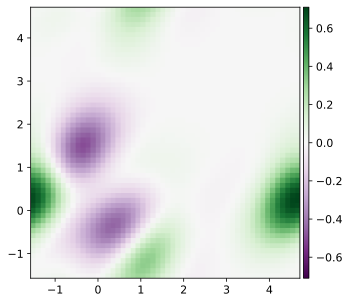

In [44]:
FQV.plot_wavefunction(which=3, mode='real',xlim=(-np.pi/2,3*np.pi/2), ylim=(-np.pi/2,3*np.pi/2))

(<Figure size 750x750 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2c9a979a10>)

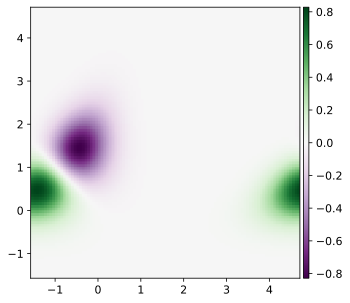

In [45]:
FQ.plot_wavefunction(which=3, mode='real',xlim=(-np.pi/2,3*np.pi/2), ylim=(-np.pi/2,3*np.pi/2))

(<Figure size 750x750 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8c1c6a3b50>)

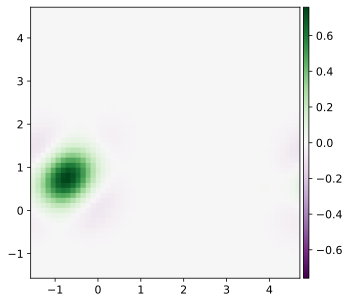

In [3]:
FQV.plot_wavefunction(which=0, mode='real',xlim=(-np.pi/2,3*np.pi/2), ylim=(-np.pi/2,3*np.pi/2))

(<Figure size 750x750 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe3c5e0a050>)

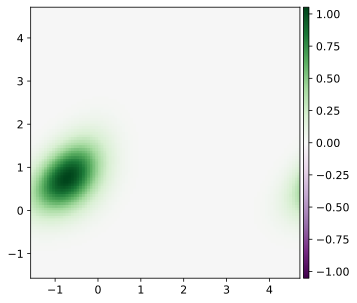

In [5]:
FQ.plot_wavefunction(which=0, xlim=(-np.pi/2,3*np.pi/2), ylim=(-np.pi/2,3*np.pi/2))

In [4]:
FQV.sorted_minima()[0]

array([5.5349512 , 0.74823409])

In [6]:
np.mod(np.matmul(sp.linalg.inv(FQV.Xi_matrix()),FQV.sorted_minima()[0]),2*np.pi)

array([5.31378759, 5.82514242])

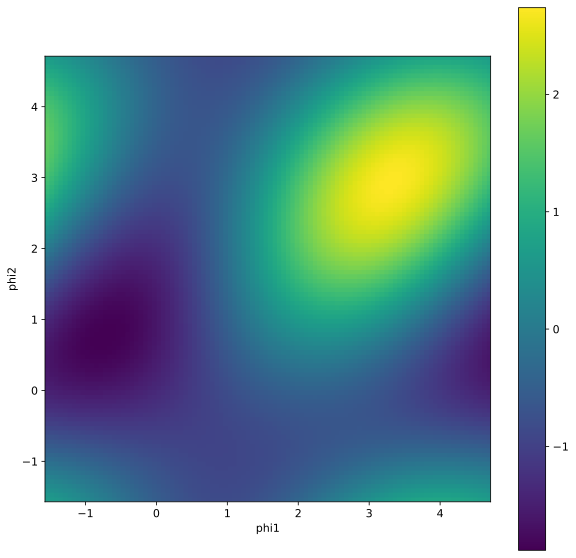

In [5]:
phi1list = np.linspace(-np.pi/2,3*np.pi/2,100)
phi2list = np.linspace(-np.pi/2,3*np.pi/2,100)
potential_holder = np.zeros((100,100))
for i,phi1 in enumerate(phi1list):
    for j,phi2 in enumerate(phi2list):
        potential_holder[i,j] = FQV.potential([phi1,phi2])
plt.figure(figsize=(10,10))
plt.imshow(np.transpose(potential_holder),extent=[-np.pi/2,3*np.pi/2,-np.pi/2,3*np.pi/2],origin='lower')
plt.xlabel('phi1')
plt.ylabel('phi2')
plt.colorbar()
plt.show()
        

In [8]:
print(FQV.sorted_minima()[0])
print(FQV.sorted_minima()[0][0])

[5.44000872 0.84317659]
5.440008718387716


In [34]:
print(FQV.sorted_minima()[0][0]-2*np.pi)

-0.7482341047545189


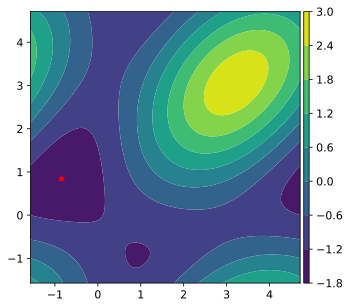

In [7]:
fig, axes = FQ.plot_potential()
axes.plot(FQV.sorted_minima()[0][0]-2*np.pi,FQV.sorted_minima()[0][1], marker="*", color="red")

(<Figure size 750x750 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f07ac079790>)

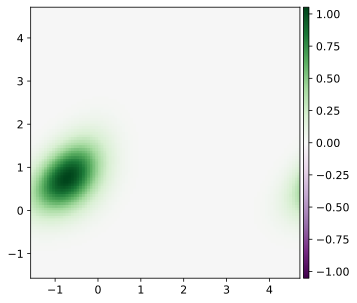

In [7]:
FQ.plot_wavefunction(which=0)

In [7]:
FQV.build_EC_matrix()

array([[3.21827083e-04, 4.97030244e-06],
       [4.97030244e-06, 3.21827083e-04]])

In [8]:
sp.linalg.inv(FQV.Xi_matrix())

array([[-1.15428444, -1.15428443],
       [-1.40831974,  1.40831976]])

In [9]:
Xi_mat = FQV.Xi_matrix()
Cmat = FQV.build_capacitance_matrix()
gmat = FQV.build_gamma_matrix()
print(np.matmul(np.transpose(Xi_mat),np.matmul(Cmat,Xi_mat)))
print(np.matmul(np.transpose(Xi_mat),np.matmul(gmat,Xi_mat)))

[[ 5.26515244e+01 -3.55271368e-15]
 [-3.55271368e-15  3.64795655e+01]]
[[ 1.00883271e-01  1.38777878e-17]
 [-6.93889390e-18  1.45606395e-01]]


In [10]:
Cmat = FQV.build_capacitance_matrix()
gmat = FQV.build_gamma_matrix()  
omegasq, eigvec = sp.linalg.eigh(gmat, b=Cmat)
print(1./(np.sqrt(omegasq)*FQV.Z0))
print(np.sqrt(omegasq)/FQV.Z0)

[52.65152439 36.47956545]
[0.10088327 0.1456064 ]


In [11]:
FQV.Xi_matrix()

array([[-0.4331688 , -0.35503301],
       [-0.43316879,  0.35503301]])

In [9]:
evals, evecs = FQV.eigensys(evals_count=4)

In [13]:
print(FQV.hamiltonian())

[[ 1.90441368e+00+0.j -4.55033575e-02+0.j -2.38443837e-02+0.j
   2.89286629e-03+0.j  2.61328354e-04+0.j  2.19699731e-04+0.j
   8.84029375e-02+0.j  1.76777588e-02+0.j -2.61711472e-03+0.j]
 [-4.55033575e-02+0.j  1.87725154e+00+0.j -8.16926155e-02+0.j
  -7.86727137e-04+0.j  4.28581560e-03+0.j  4.53968771e-03+0.j
   2.15005646e-02+0.j  8.10615950e-02+0.j  2.22846127e-02+0.j]
 [-2.02893760e-02+0.j -8.16926153e-02+0.j  1.94302709e+00+0.j
  -1.28920667e-04+0.j -1.50443847e-03+0.j  4.59705045e-03+0.j
  -4.13002065e-03+0.j  2.85042475e-02+0.j  7.88677718e-02+0.j]
 [ 3.04467455e-03+0.j -8.19000313e-04+0.j -1.35685980e-04+0.j
   2.02931789e+00+0.j -1.75758749e-02+0.j -2.35839583e-02+0.j
  -2.49835081e-02+0.j  6.50766154e-03+0.j  1.73062153e-03+0.j]
 [-1.86705580e-03+0.j  1.27751491e-03+0.j -6.94843809e-04+0.j
  -1.75758749e-02+0.j  1.99417529e+00+0.j -4.22406083e-02+0.j
   1.17838591e-02+0.j -1.91431679e-02+0.j  1.44969284e-02+0.j]
 [-2.19700671e-04+0.j -6.81052897e-03+0.j  5.92070584e-04+0.j
  -

In [14]:
print(evecs.T[0])

[-0.38702666+0.j -0.6656836 +0.j -0.43816676+0.j -0.01168475+0.j
 -0.01223993+0.j -0.00951223+0.j  0.21187506+0.j  0.34687885+0.j
  0.22246975+0.j]


CPU times: user 45.6 s, sys: 12 ms, total: 45.6 s
Wall time: 45.6 s


(<Figure size 900x600 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2c9a7ecc90>)

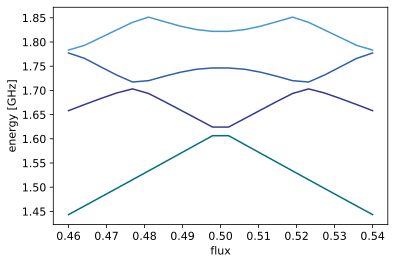

In [49]:
flux_list = np.linspace(.46, .54, 20)
%time FQV.plot_evals_vs_paramvals('flux', flux_list, evals_count=4, subtract_ground=False,)

CPU times: user 3.79 s, sys: 72 ms, total: 3.86 s
Wall time: 702 ms


(<Figure size 900x600 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2c9b1f6f90>)

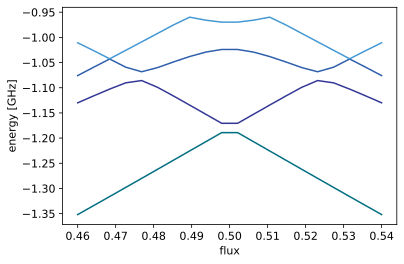

In [33]:
flux_list = np.linspace(.46, .54, 20)
%time FQ.plot_evals_vs_paramvals('flux', flux_list, evals_count=4, subtract_ground=False,)

CPU times: user 1min 23s, sys: 12 ms, total: 1min 23s
Wall time: 1min 23s


(<Figure size 900x600 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f37e0a32850>)

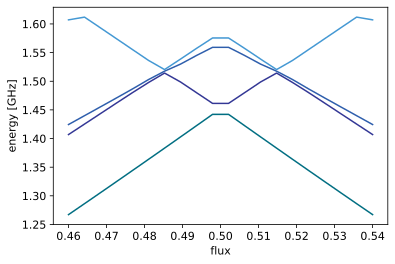

In [5]:
flux_list = np.linspace(.46, .54, 20)
%time FQV.plot_evals_vs_paramvals('flux', flux_list, evals_count=4, subtract_ground=False,)

In [5]:
phi_vec = np.linspace(-np.pi/2, 3*np.pi/2, 6)
phi_outer = np.outer(phi_vec, phi_vec)

In [6]:
np.add.outer(phi_vec, phi_vec)

array([[-3.14159265, -1.88495559, -0.62831853,  0.62831853,  1.88495559,
         3.14159265],
       [-1.88495559, -0.62831853,  0.62831853,  1.88495559,  3.14159265,
         4.39822972],
       [-0.62831853,  0.62831853,  1.88495559,  3.14159265,  4.39822972,
         5.65486678],
       [ 0.62831853,  1.88495559,  3.14159265,  4.39822972,  5.65486678,
         6.91150384],
       [ 1.88495559,  3.14159265,  4.39822972,  5.65486678,  6.91150384,
         8.1681409 ],
       [ 3.14159265,  4.39822972,  5.65486678,  6.91150384,  8.1681409 ,
         9.42477796]])

In [ ]:
phi1phi2_psi = [np.sum(FQV.harm_osc_wavefunction())]

In [7]:
Xi_inv = sp.linalg.inv(FQV.Xi_matrix())
EC_mat = FQV.build_EC_matrix()
EC_mat_t = np.matmul(Xi_inv,np.matmul(EC_mat,np.transpose(Xi_inv)))

In [8]:
print(EC_mat_t)

[[8.70831737e-04 3.25260652e-19]
 [3.25260652e-19 1.25688499e-03]]


In [15]:
a_0=FQV.a_operator(0)
a_1=FQV.a_operator(1)
print(a_0)
print(a_0*a_1)
print(np.matmul(a_0,a_1))

[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
